# Instructions

The places where you have enter code, to answer the questions, are marked with `# YOUR CODE HERE`. Once you have written your code you should remove any `raise NotImplementedError()` statements.



## Question 1 (6 points)

Given the following QUBO, complete the function `create_bqm` so that it returns the corresponding BQM.

$$- 7x_1 - 2x_2 - 10x_3 - 4x_4 + 5x_1x_2 + 3x_1x_3 + 6x_2x_3 - 8x_3x_4 - 2$$


The function `create_bqm` has

- Input: None
- Returns:
    - A BQM instance


In [13]:
%pip install dimod


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from dimod import BQM

def create_bqm():
    # YOUR CODE HERE
    
    # Coefficients for the linear terms
    linear_terms = {1: -7, 2: -2, 3: -10, 4: -4}

    # Coefficients for the quadratic terms
    quadratic_terms = {(1, 2): 5, (1, 3): 3, (2, 3): 6, (3, 4): -8}

    # Offset term
    offset = -2

    # Create the BQM instance
    bqm = BQM('BINARY')

    # Set the linear terms
    bqm.add_variables_from(linear_terms)

    # Set the quadratic terms
    bqm.add_interactions_from(quadratic_terms)

    # Set the offset
    bqm.offset = offset
    
    # raise NotImplementedError()
    # Do not modify anything below this line
    return bqm


In [15]:
# You can use this cell to call and check the output of the function

print(create_bqm())

BinaryQuadraticModel({1: -7.0, 2: -2.0, 3: -10.0, 4: -4.0}, {(2, 1): 5.0, (3, 1): 3.0, (3, 2): 6.0, (4, 3): -8.0}, -2.0, 'BINARY')


In [16]:
# hidden tests will be used for grading.

## Question 2 (6 points)

Function `solve_Q` takes as input a matrix representation of a QUBO formulation. Complete the function `solve_Q` so that it returns the solution to the given problem. Use D-Wave's `ExactSolver()`.


The function `solve_Q` has

- Input:
    - Q matrix representation of QUBO as an `numpy.array`.
- Returns:
    - Sample with the lowest energy (first sample of the SampleSet)


In [17]:
from dimod import BQM

def solve_Q(Q):
    # YOUR CODE HERE

    # Convert the Q matrix into a BQM
    bqm = BQM.from_numpy_matrix(Q)

    # Solve the BQM using ExactSolver
    solver = ExactSolver()
    sampleset = solver.sample(bqm)

    # raise NotImplementedError()
    # Do not modify anything below this line
    return sampleset.first


In [18]:
# You can use this cell to call and check the output of the function
import numpy as np
from dimod.reference.samplers import ExactSolver

Q = np.array([[1, 1], [0, 1]])
print(solve_Q(Q))


Sample(sample={0: 0, 1: 0}, energy=0.0, num_occurrences=1)


C:\Users\diego\AppData\Local\Temp\ipykernel_21232\1344169528.py:7: DeprecationWarning: BQM.from_numpy_matrix(M) is deprecated since dimod 0.10.0 and will be removed in 0.12.0. Use BQM(M, "BINARY") instead.
  bqm = BQM.from_numpy_matrix(Q)


In [19]:
# hidden tests will be used for grading.

## Question 3 (6 points)

You are given a graph $G$ in the next cell where the nodes are labeled $0,1,\dots,8$. Create a BQM with `SPIN` variables to solve Max-Cut problem for the given graph. Variables should be named with the name of the correspoding node.

The function `max_cut` has

- Input: None 
- Returns:
    - BQM with SPIN variables for graph `G`



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


EdgeView([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)])

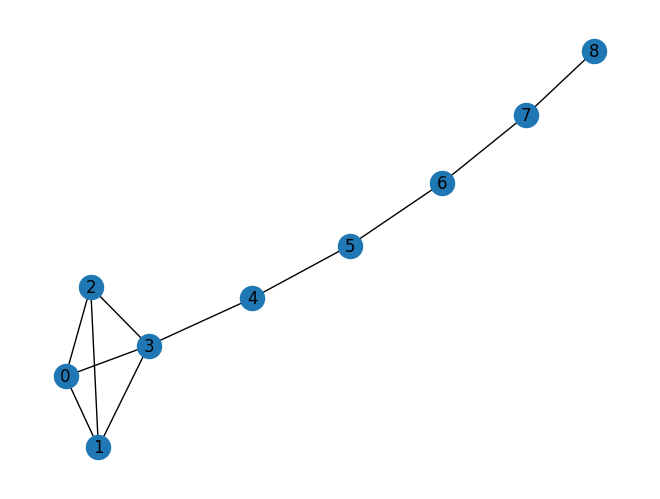

In [20]:
%pip install networkx

import networkx as nx

G = nx.lollipop_graph(4, 5)
nx.draw(G, with_labels=True)
G.edges


In [21]:
from dimod import BQM

def max_cut():
    # YOUR CODE HERE

    # Create the graph
    G = nx.lollipop_graph(4, 5)
    
    # Create a BQM instance with SPIN variables
    bqm = BQM('SPIN')
    
    # Add linear biases
    for node in G.nodes:
        bqm.add_variable(node, 0.0)  # Initialize all linear biases to 0
    
    # Add quadratic biases
    for edge in G.edges:
        bqm.add_interaction(*edge, 1.0)  # Set quadratic bias to 1 for each edge

    # raise NotImplementedError()
    # Do not modify anything below this line
    return bqm


In [22]:
# You can use this cell to call and check the output of the function
print(max_cut())


BinaryQuadraticModel({0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, {(1, 0): 1.0, (2, 0): 1.0, (2, 1): 1.0, (3, 0): 1.0, (3, 1): 1.0, (3, 2): 1.0, (4, 3): 1.0, (5, 4): 1.0, (6, 5): 1.0, (7, 6): 1.0, (8, 7): 1.0}, 0.0, 'SPIN')


In [23]:
# hidden tests will be used for grading.
# If this cell results in an error, your implementation is incorrect